In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv("./fuel_econ.csv")
data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
data.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

Here, you can see that the numeric data takes on a different shape in each categorical level: Some bimodality is suggested in group Alpha, a relatively high variance is observed in Beta, and Gamma and Delta are skewed negatively and positively, respectively. You can also see that each level has been rendered in a different color, like how the plain countplot was in the previous lesson. We can set the "color" parameter to make each curve the same color if it is not meaningful.

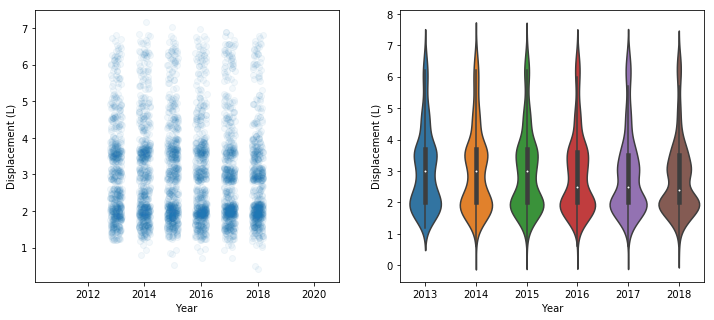

In [5]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = data, x = 'year', y = 'displ', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/20})
plt.xlabel("Year");
plt.ylabel("Displacement (L)");

# right plot: basic Violin Plot
plt.subplot(1, 2, 2)

sb.violinplot(data = data, x = 'year', y = 'displ');
plt.xlabel("Year");
plt.ylabel("Displacement (L)");



If we don't want color lets get the base color and set it.  We can also remove the box plot by setting inner = None

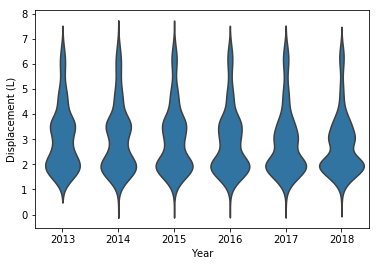

In [6]:
base_color = sb.color_palette()[0]
sb.violinplot(data = data, x = 'year', y = 'displ', color=base_color, inner = None);
plt.xlabel("Year");
plt.ylabel("Displacement (L)");

Much like how the bar chart could be rendered with horizontal bars, the violin plot can also be rendered horizontally. Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the "orient" parameter can be used to specify the plot orientation.

In this case where I forced the orientation to horizontal, I had to change the assignment of the variables.  The plot is smart enough to figureout which one is the categorical variable if one is a string but if they are both numbers this has to be done manually. 

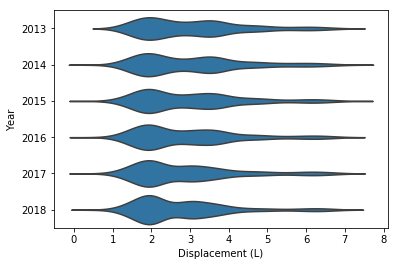

In [7]:
base_color = sb.color_palette()[0]
sb.violinplot(data = data, x = 'displ', y = 'year', color=base_color, inner = None, orient = "h" );
plt.ylabel("Year");
plt.xlabel("Displacement (L)");

We will now look at the relationship between our fuel efficiency variable against a qualitative variable, vehicle class.  Note here I have used pandas astype function to convert the VClass column from a plain object type into an ordered categorical type putting the classes in order of size.  This way the sorting of levels is automatic and I won't need to set an ordering parameter in my viz calls. 

In [8]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
data["VClass"] = data["VClass"].astype(vclasses)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

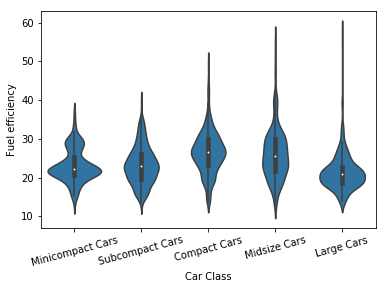

In [9]:
base_color = sb.color_palette()[0]
sb.violinplot(data = data, x = 'VClass', y = 'comb', color=base_color );
plt.xlabel("Car Class");
plt.ylabel("Fuel efficiency");
# lets rotate the labels a little so we can see them or they run into each other
plt.xticks(rotation = 15)

In the middle of each violin plot is a mini box plot. Full box plots are covered in the next section

###Plotting Summary Statistics

By setting ```inner = "quartile"```, the lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates, the median, and the two lines with shorter dashes on either side the firs and third quartiles.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

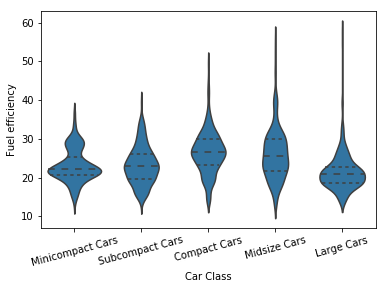

In [10]:
base_color = sb.color_palette()[0]
sb.violinplot(data = data, x = 'VClass', y = 'comb', color=base_color, inner = "quartile" );
plt.xlabel("Car Class");
plt.ylabel("Fuel efficiency");
plt.xticks(rotation = 15)